# Credit Card Data Exploration

We will explore data that has been provided to us.

In [1]:
# Load the Packages and Check the Versions

import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn

In [2]:
print('The Python version is {}.\n'.format(sys.version))
print('The Numpy version is {}.\n'.format(np.__version__))
print('The Pandas version is {}.\n'.format(pd.__version__))
print('The Matplotlib version is {}.\n'.format(mpl.__version__))
print('The Scikit-Learn version is {}.\n'.format(sklearn.__version__))

The Python version is 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)].

The Numpy version is 1.20.1.

The Pandas version is 1.2.4.

The Matplotlib version is 3.3.4.

The Scikit-Learn version is 0.24.1.



# Loading the Data

In [3]:
df = pd.read_excel('ClientCreditCard.xls')

In [4]:
df.shape

(30000, 25)

# Verifying Basic Data Integrity

In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.shape

(30000, 25)

In [8]:
df['ID'].nunique()

29687

Has less than the number of rows, so there are duplicates.

In [9]:
id_counts = df['ID'].value_counts()
id_counts.head()

20b16b21-8b23    2
37a1d9c2-701c    2
5f79f818-18af    2
45cceda0-6fb7    2
a53a8d32-2c61    2
Name: ID, dtype: int64

In [10]:
id_counts.head(15)

20b16b21-8b23    2
37a1d9c2-701c    2
5f79f818-18af    2
45cceda0-6fb7    2
a53a8d32-2c61    2
87dec940-75b7    2
0913d642-c5d4    2
89d3cebd-346f    2
dbf9fb14-2656    2
b4937915-ad67    2
659da309-053c    2
129c43ca-42ee    2
ff6e1bd3-4e91    2
af1e3f79-f628    2
f9bcd13e-96bc    2
Name: ID, dtype: int64

In [11]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

# Boolean Masks

In [12]:
np.random.seed(seed = 24)
random_integers = np.random.randint(low = 1, high = 5, size = 100)

In [13]:
random_integers[:5]

array([3, 4, 1, 4, 2])

In [14]:
is_equal_to_3 = random_integers == 3

In [15]:
is_equal_to_3[:5]

array([ True, False, False, False, False])

In [16]:
sum(is_equal_to_3)

22

In [17]:
random_integers[is_equal_to_3]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

# Continuing Verification of Data Integrity

In [18]:
dupe_mask = id_counts == 2

In [19]:
dupe_mask[:5]

20b16b21-8b23    True
37a1d9c2-701c    True
5f79f818-18af    True
45cceda0-6fb7    True
a53a8d32-2c61    True
Name: ID, dtype: bool

In [20]:
id_counts.index[0:5]

Index(['20b16b21-8b23', '37a1d9c2-701c', '5f79f818-18af', '45cceda0-6fb7',
       'a53a8d32-2c61'],
      dtype='object')

In [21]:
dupe_ids = id_counts.index[dupe_mask]

In [22]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [23]:
dupe_ids[:5]

['20b16b21-8b23',
 '37a1d9c2-701c',
 '5f79f818-18af',
 '45cceda0-6fb7',
 'a53a8d32-2c61']

In [24]:
df.loc[df['ID'].isin(dupe_ids[0:3]), :].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5998,5f79f818-18af,200000,1,3,2,33,0,0,0,0,...,119730,122537,109504,7100,5354,4363,4816,4381,3330,0
6098,5f79f818-18af,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13038,37a1d9c2-701c,190000,1,2,2,33,Not available,0,0,0,...,155584,157988,154366,7063,8004,5500,7000,6000,5000,0
13138,37a1d9c2-701c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13186,20b16b21-8b23,750000,2,1,2,28,1,-1,-1,0,...,399493,400993,409483,250000,401003,7990,11000,417990,3080,0
13286,20b16b21-8b23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df.shape

(30000, 25)

In [26]:
df_zero_mask = df == 0

In [27]:
df_zero_mask.shape

(30000, 25)

In [28]:
feature_zero_mask = df_zero_mask.iloc[:, 1:].all(axis = 1)

In [29]:
sum(feature_zero_mask)

315

In [30]:
df_clean_1 = df.loc[~feature_zero_mask, :].copy()

In [31]:
df_clean_1.shape

(29685, 25)

In [32]:
df_clean_1['ID'].nunique()

29685

# Explore the Columns of Data

In [33]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [34]:
df_clean_1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [35]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [36]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [37]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'

In [38]:
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [39]:
sum(valid_pay_1_mask)

26664

In [40]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask, :].copy()

In [41]:
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [42]:
df_clean_2.shape

(26664, 25)

In [43]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  object
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

In [44]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

In [45]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

In [46]:
import matplotlib.pyplot as plt

In [47]:
# Render Plotting Automatically
%matplotlib inline

In [48]:
mpl.rcParams['figure.dpi'] = 400 # High resolution figures

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>]], dtype=object)

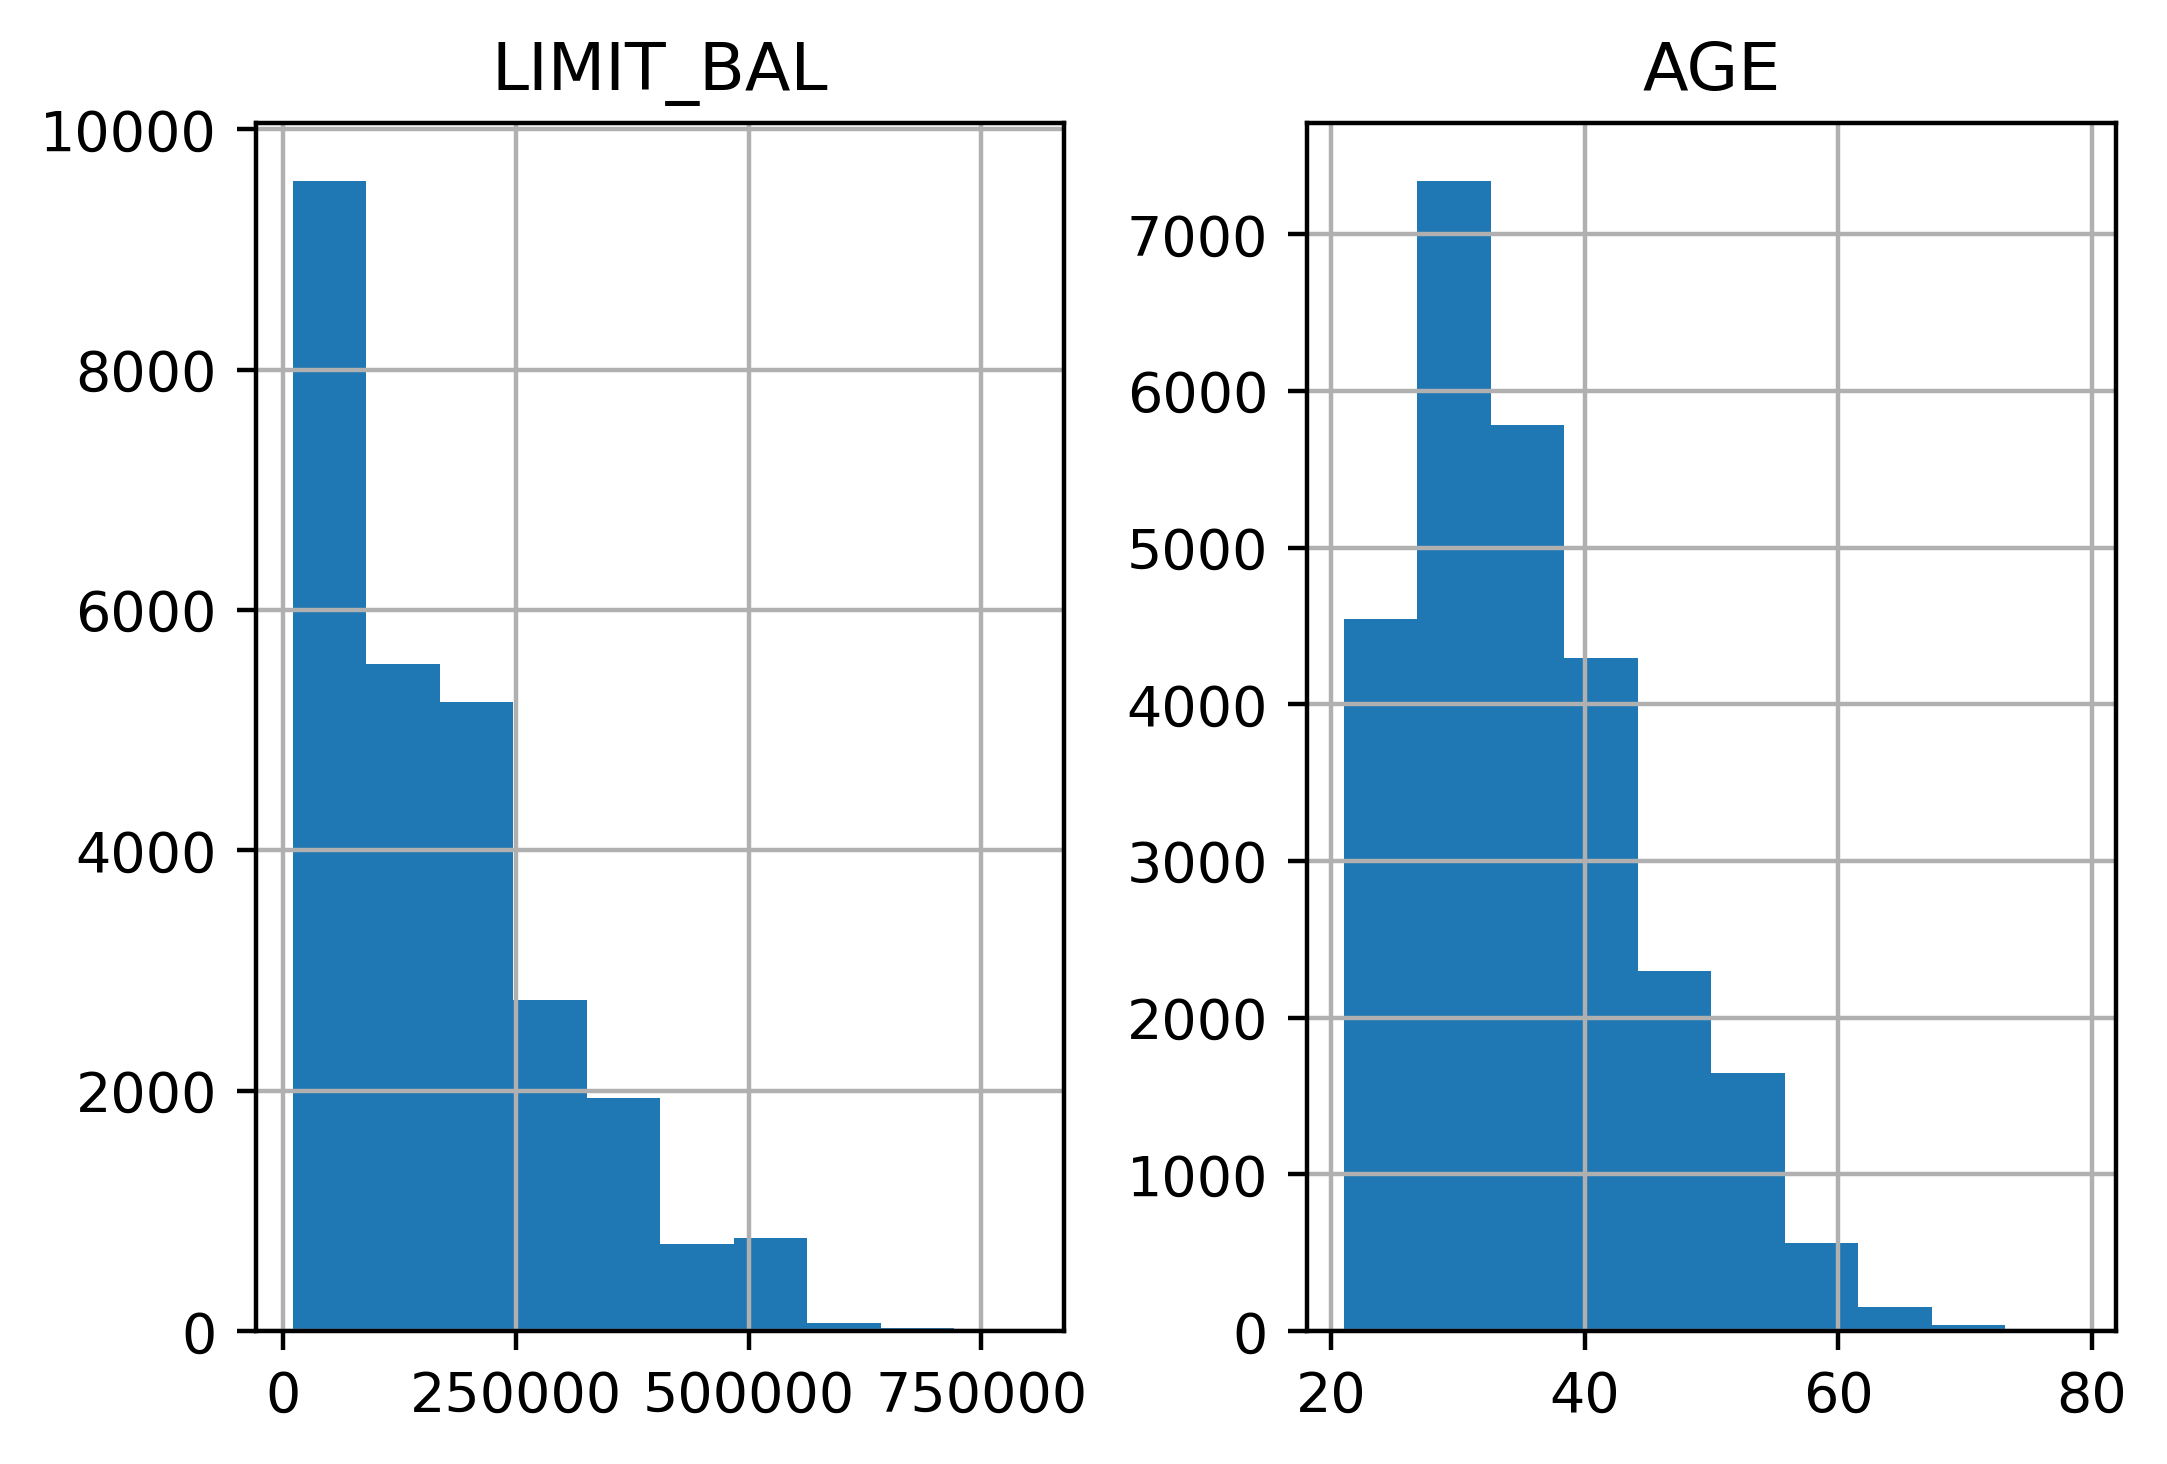

In [49]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [52]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [53]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [54]:
# Assign Unknown Categories to '4'
df_clean_2['EDUCATION'].replace(to_replace = [0, 5, 6], value = 4, inplace = True)

In [55]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [56]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [57]:
df_clean_2['MARRIAGE'].replace(to_replace = [0], value = 3, inplace = True)

In [58]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

# Categorical Features

In [59]:
from scipy import stats
import numpy as np

In [60]:
X = np.array(range(1, 11))

In [61]:
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [62]:
np.random.seed(seed = 24)
Y = 2 * X + np.random.normal(0, 1, 10)

In [63]:
slope_line, intercept_line, r_value, p_value, std_err = stats.linregress(X, Y)

([<matplotlib.axis.YTick at 0x1ebe3888b80>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

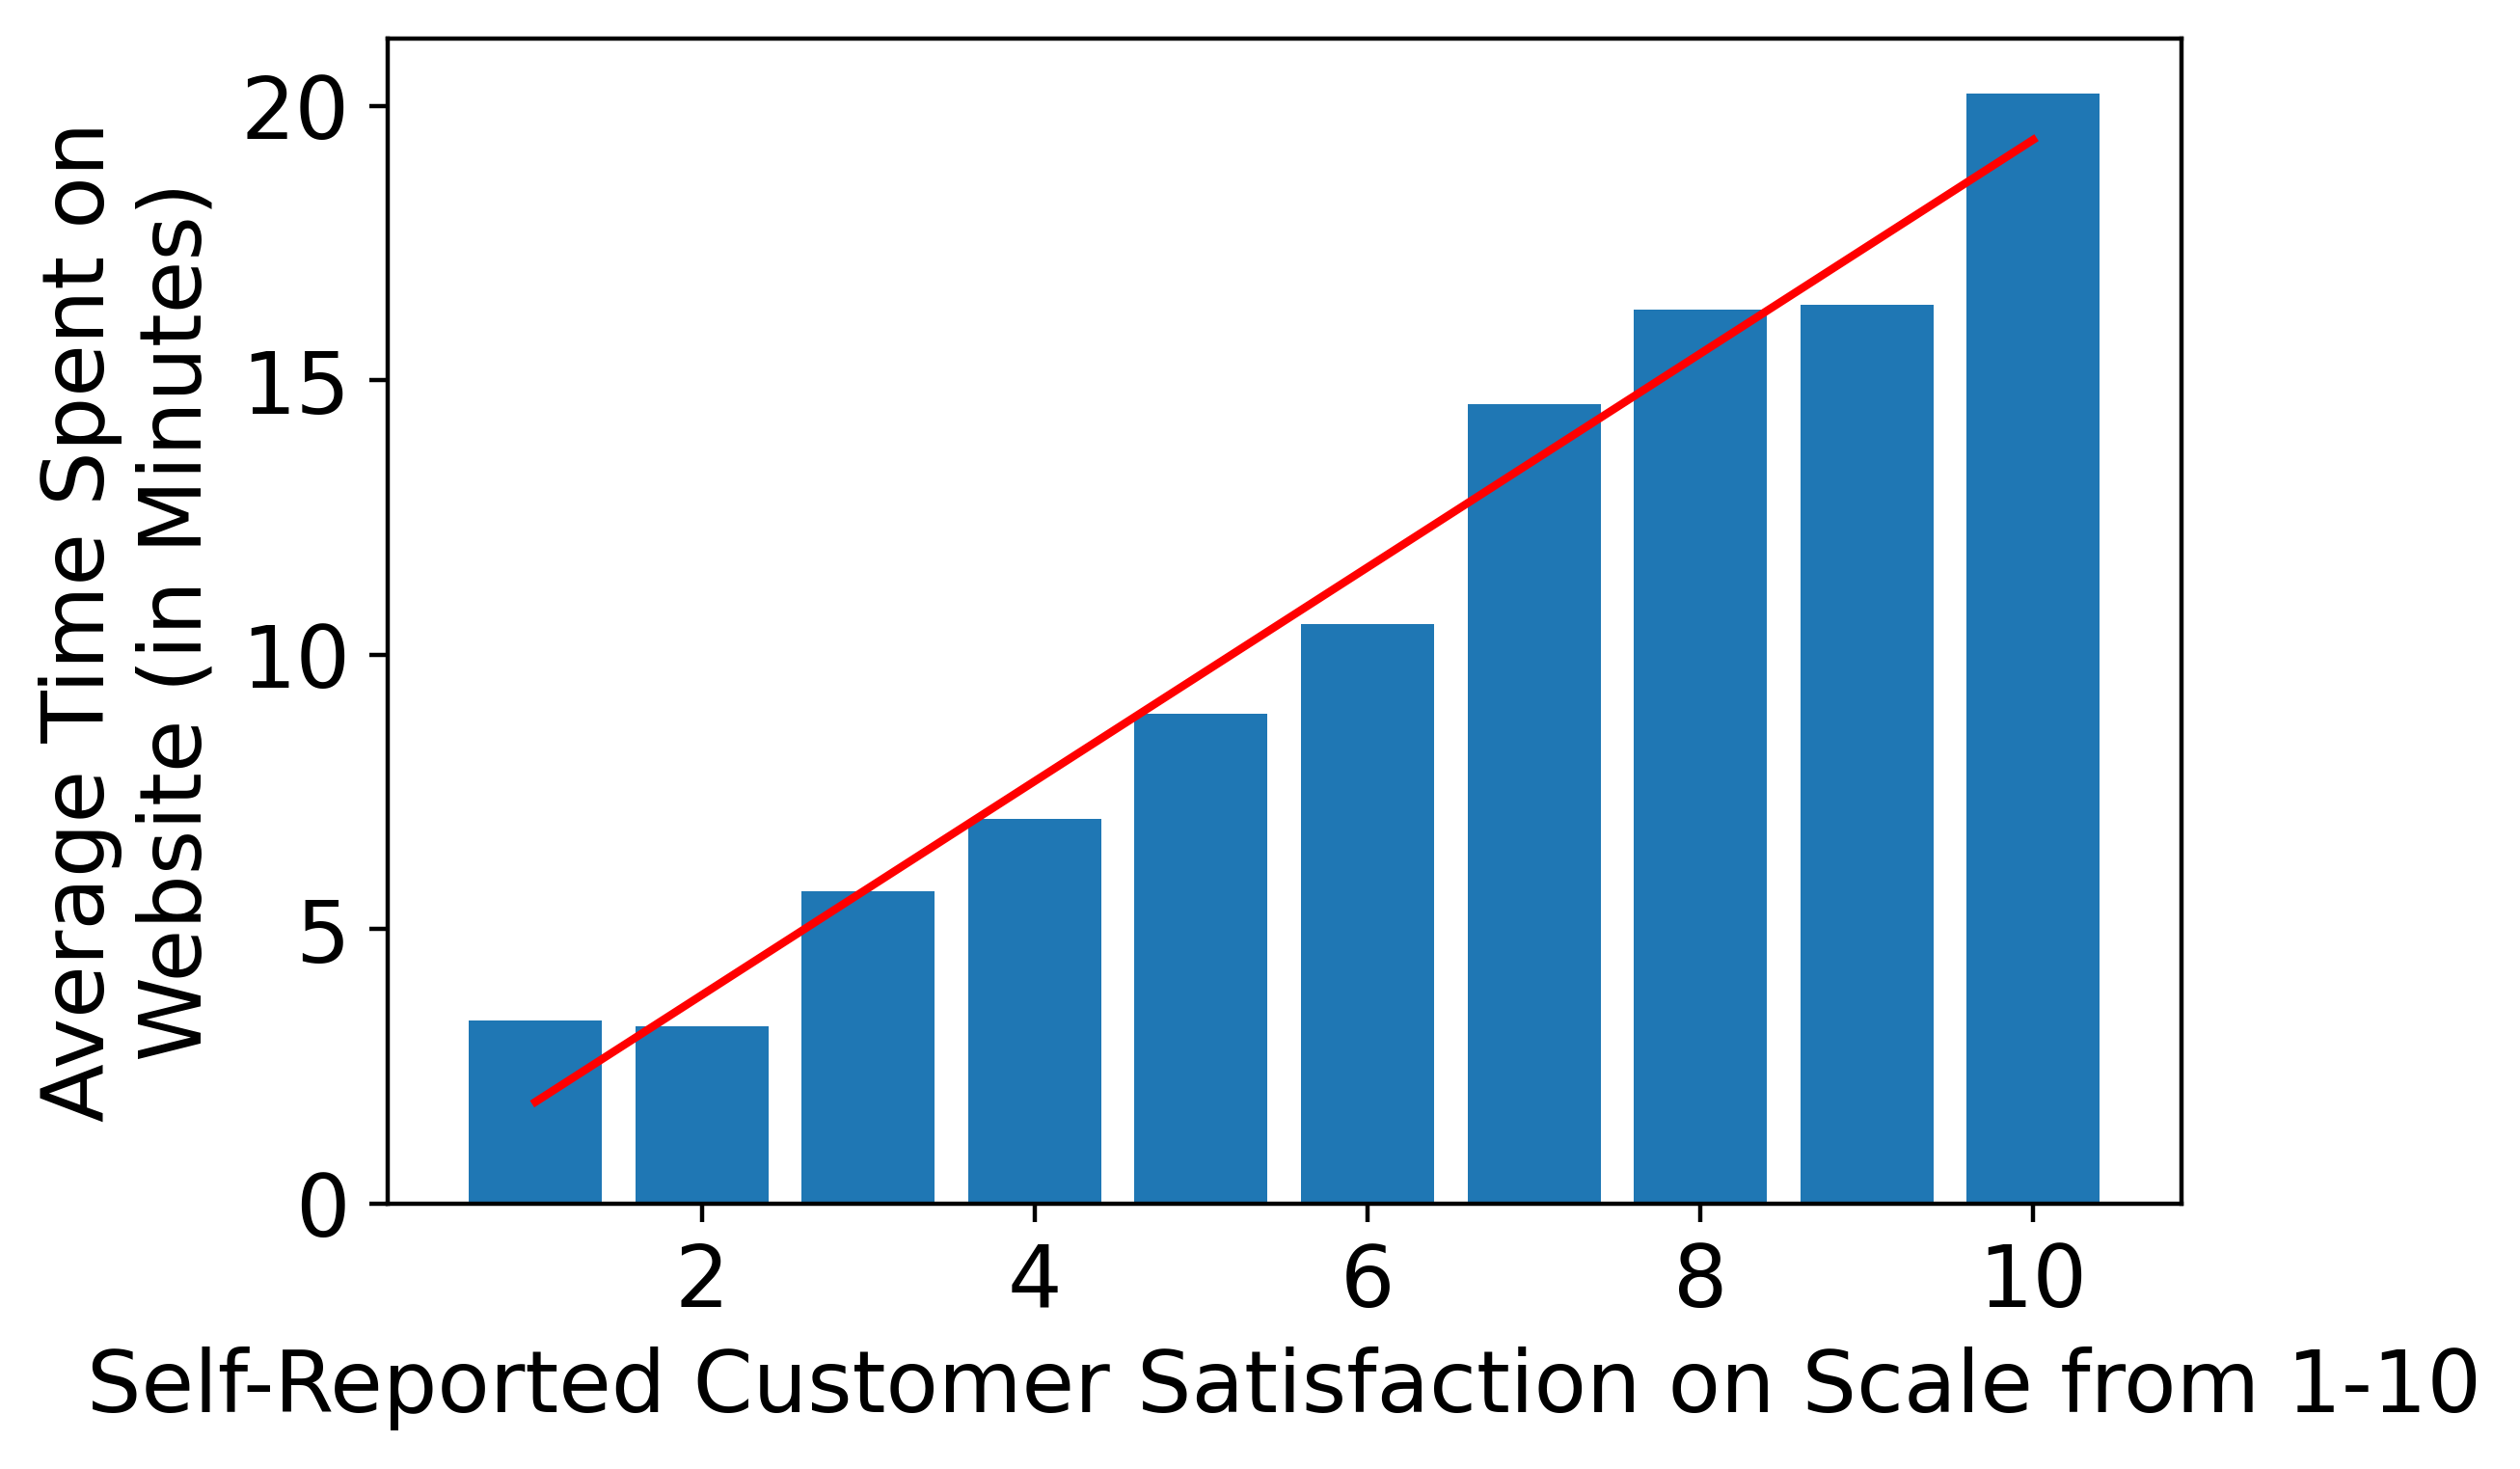

In [66]:
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 16
plt.plot(X, intercept_line + slope_line * X, 'r-')
plt.bar(X, Y, align = 'center')
plt.xlabel('Self-Reported Customer Satisfaction on Scale from 1-10')
plt.ylabel('Average Time Spent on\nWebsite (in Minutes)')
plt.yticks(range(0, 25, 5))

In [67]:
np.random.seed(seed = 20)
noise = np.random.normal(0, 1, 10)
Y_poly = -1 * (X - 2) * (X - 9) + 10 + noise

In [68]:
slope_poly, intercept_poly, r_value, p_value, std_err = stats.linregress(X, Y_poly)

Text(0, 0.5, 'Average Time Spent on\nWebsite (in Minutes)')

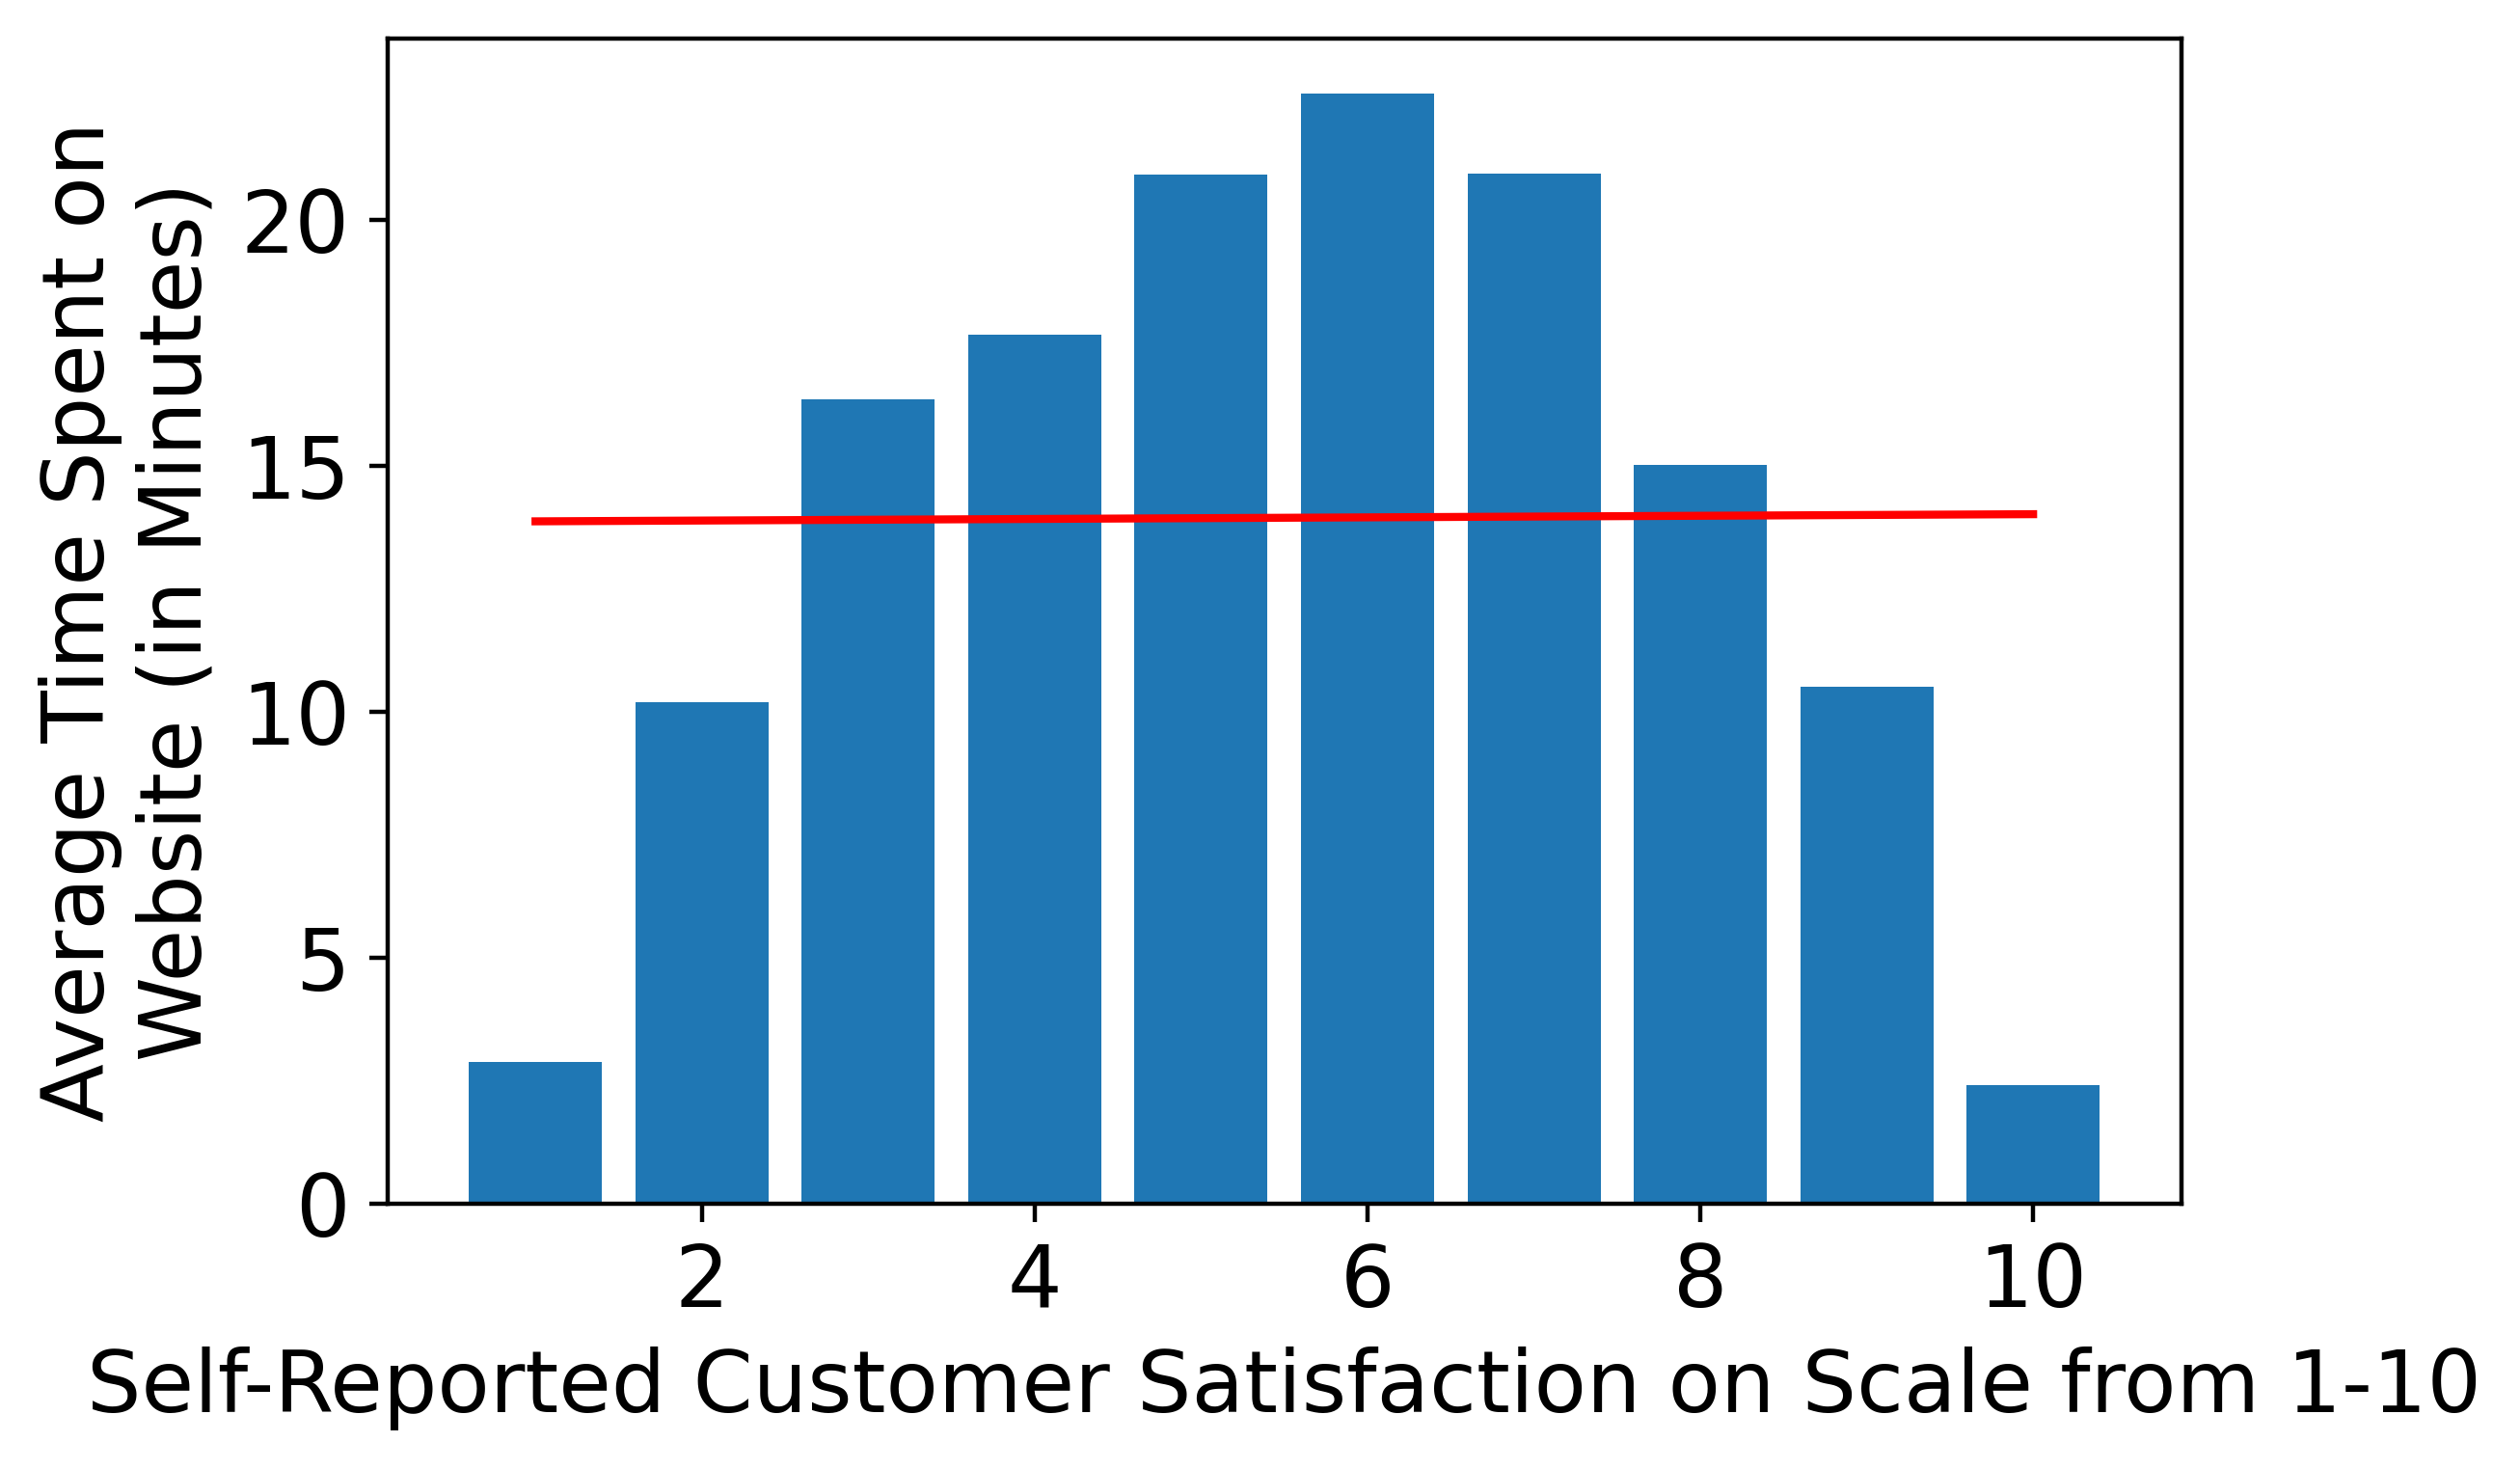

In [69]:
plt.plot(X, intercept_poly + slope_poly * X, 'r-')
plt.bar(X, Y_poly, align = 'center')
plt.xlabel('Self-Reported Customer Satisfaction on Scale from 1-10')
plt.ylabel('Average Time Spent on\nWebsite (in Minutes)')

In [73]:
# Check Education for Ordinal Coding
df_clean_2.groupby('EDUCATION').agg({'default payment next month': 'mean'})

,default payment next month
EDUCATION,
1,0.193901
2,0.235913
3,0.255479
4,0.074879


Text(0.5, 0, 'Education Level: Ordinal Coding')

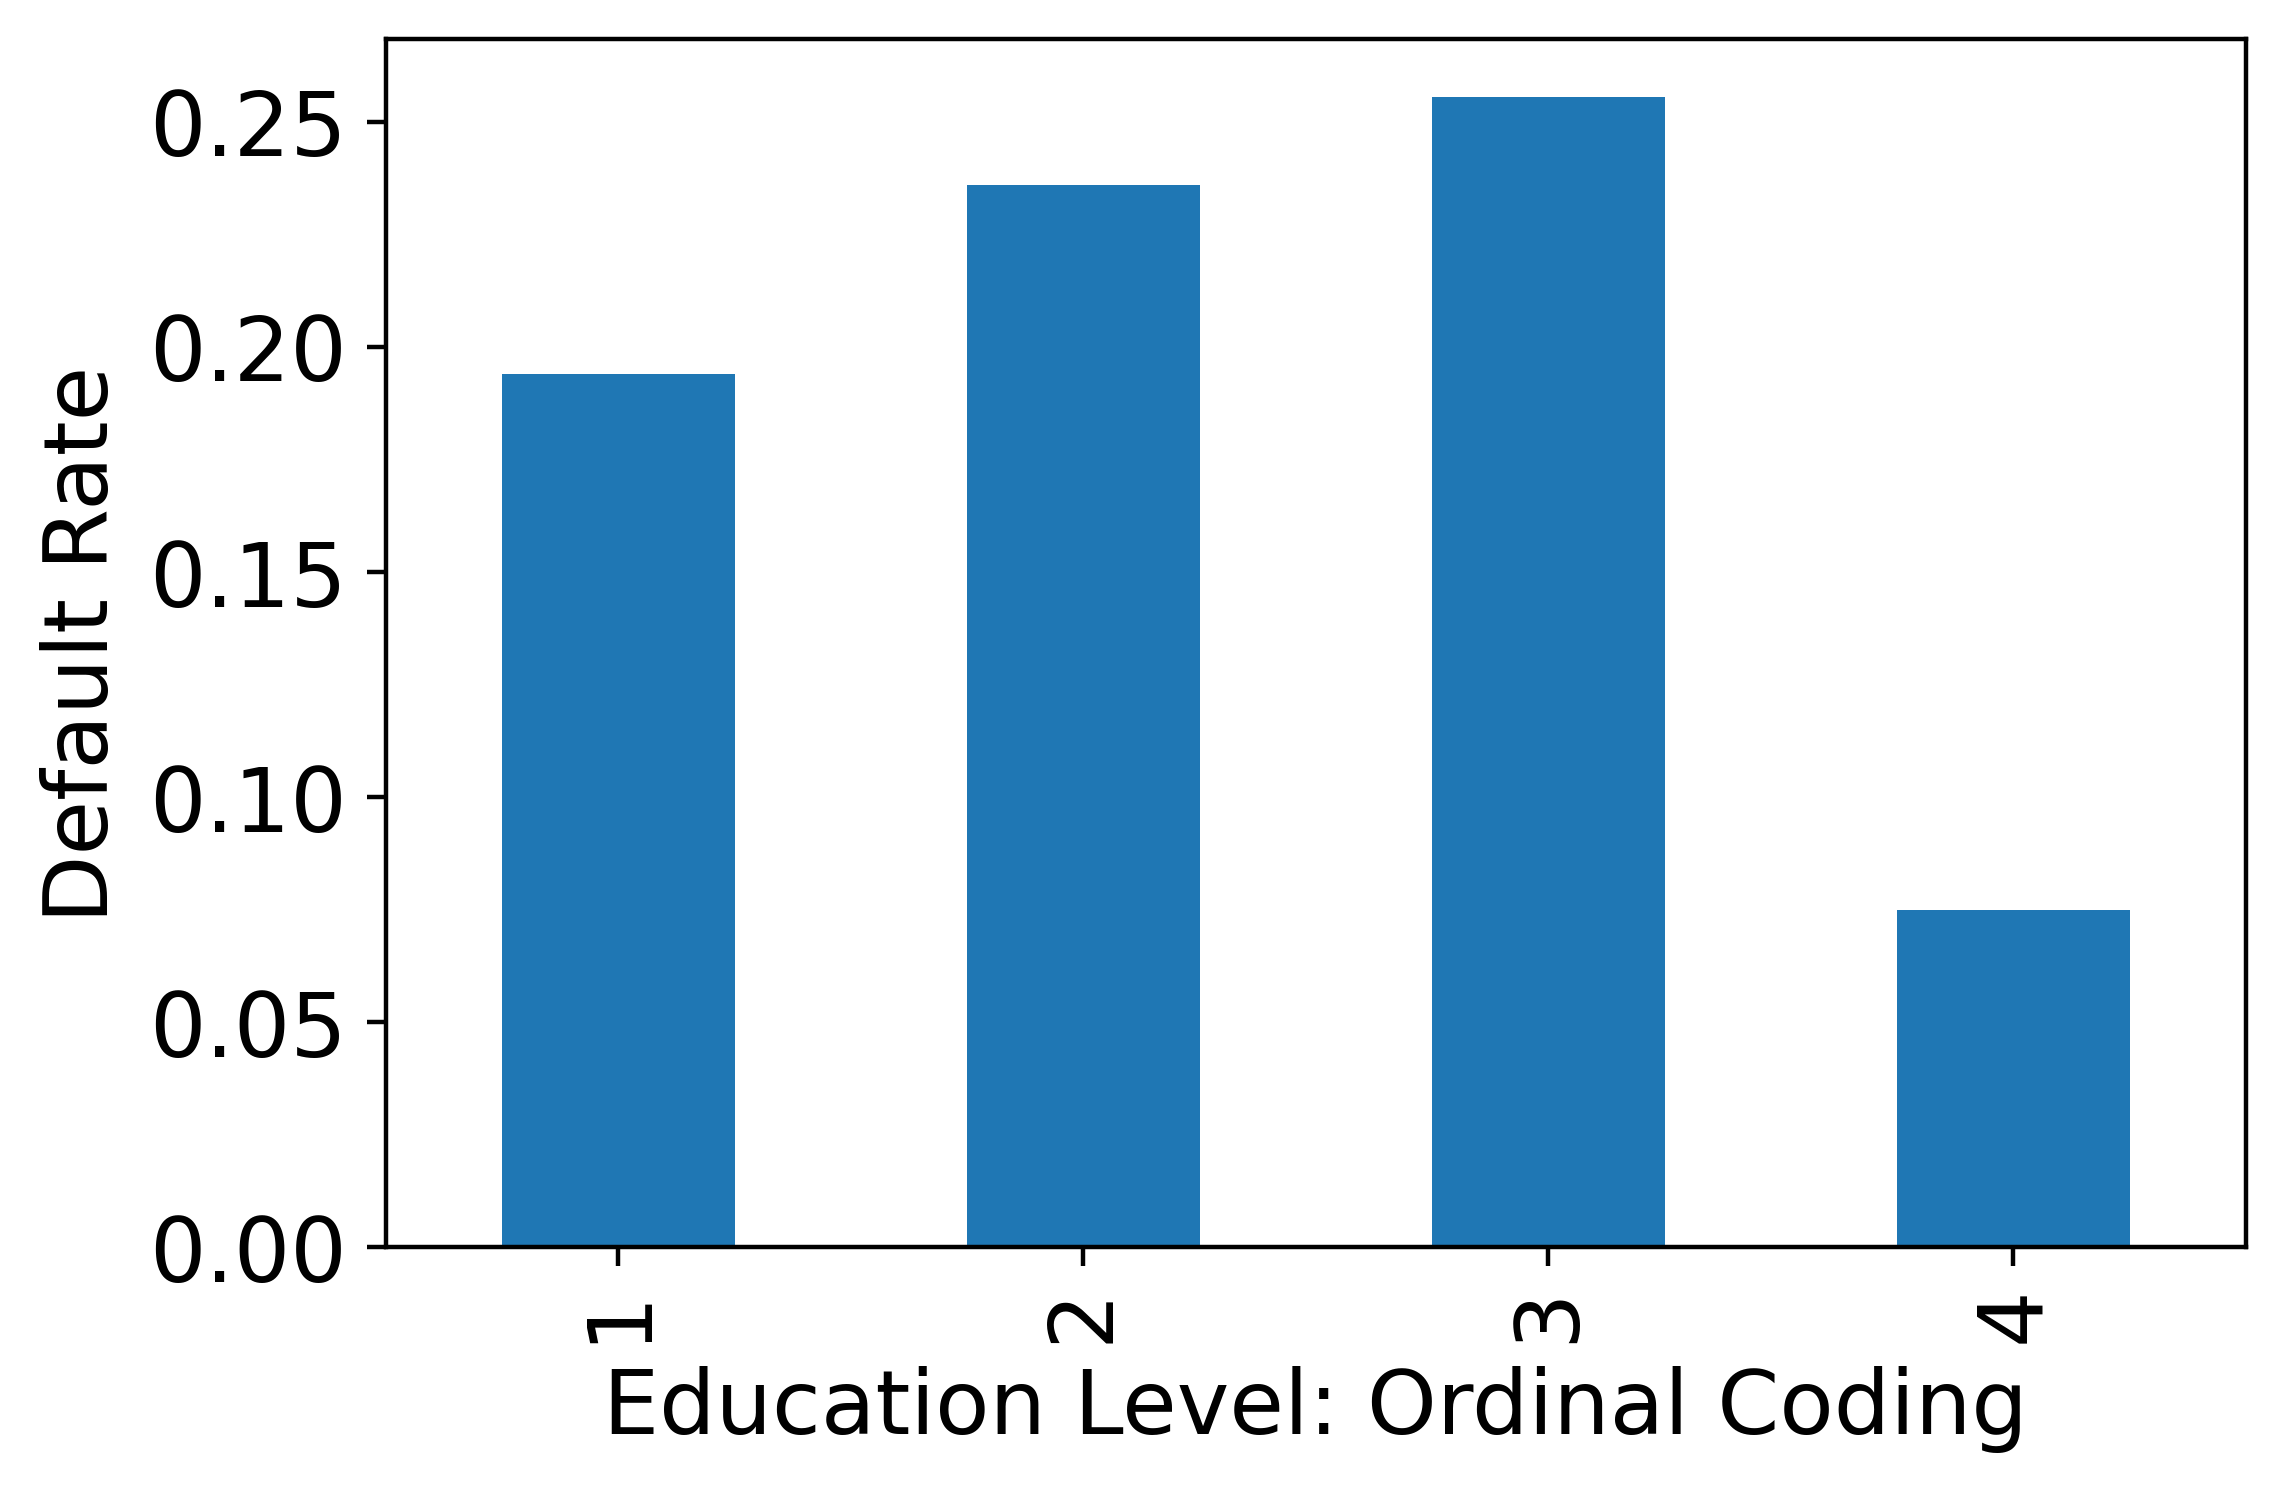

In [75]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month': 'mean'}).plot.bar(legend = False)
plt.ylabel('Default Rate')
plt.xlabel('Education Level: Ordinal Coding')

# Implementing One-Hot Encoding for a Categorical Feature

In [76]:
df_clean_2['EDUCATION'].head()

0    2
1    2
2    2
3    2
4    2
Name: EDUCATION, dtype: int64

In [77]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

In [78]:
df_clean_2['EDUCATION_CAT'] = 'none'

In [79]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [86]:
# Education (1 = Graduate School; 2 = University; 3 = High School; 4 = Other)
cat_mapping = {
    1: "Graduate School",
    2: "University",
    3: "High School",
    4: "Other"
}

In [87]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)

In [88]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,University
1,2,University
2,2,University
3,2,University
4,2,University
5,1,Graduate School
6,1,Graduate School
7,2,University
8,3,High School
9,3,High School


In [89]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,Graduate School,High School,Other,University
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [90]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis = 1)
df_with_ohe[['EDUCATION_CAT', 'Graduate School',
            'High School', 'University', 'Other']].head(10)

,EDUCATION_CAT,Graduate School,High School,University,Other
0,University,0,0,1,0
1,University,0,0,1,0
2,University,0,0,1,0
3,University,0,0,1,0
4,University,0,0,1,0
5,Graduate School,1,0,0,0
6,Graduate School,1,0,0,0
7,University,0,0,1,0
8,High School,0,1,0,0
9,High School,0,1,0,0


In [91]:
df_with_ohe.shape

(26664, 30)

In [92]:
df_with_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

In [93]:
df_with_ohe.to_csv('ClientCreditCard_cleaned.csv', index = False)

In [94]:
df = pd.read_csv('ClientCreditCard_cleaned.csv')

In [95]:
df.shape

(26664, 30)

In [96]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,Graduate School,High School,Other,University
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,University,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,University,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,University,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,University,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,University,0,0,0,1


In [97]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [98]:
pay_feats

['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [99]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [100]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

In [101]:
df['PAY_1'].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

<AxesSubplot:>

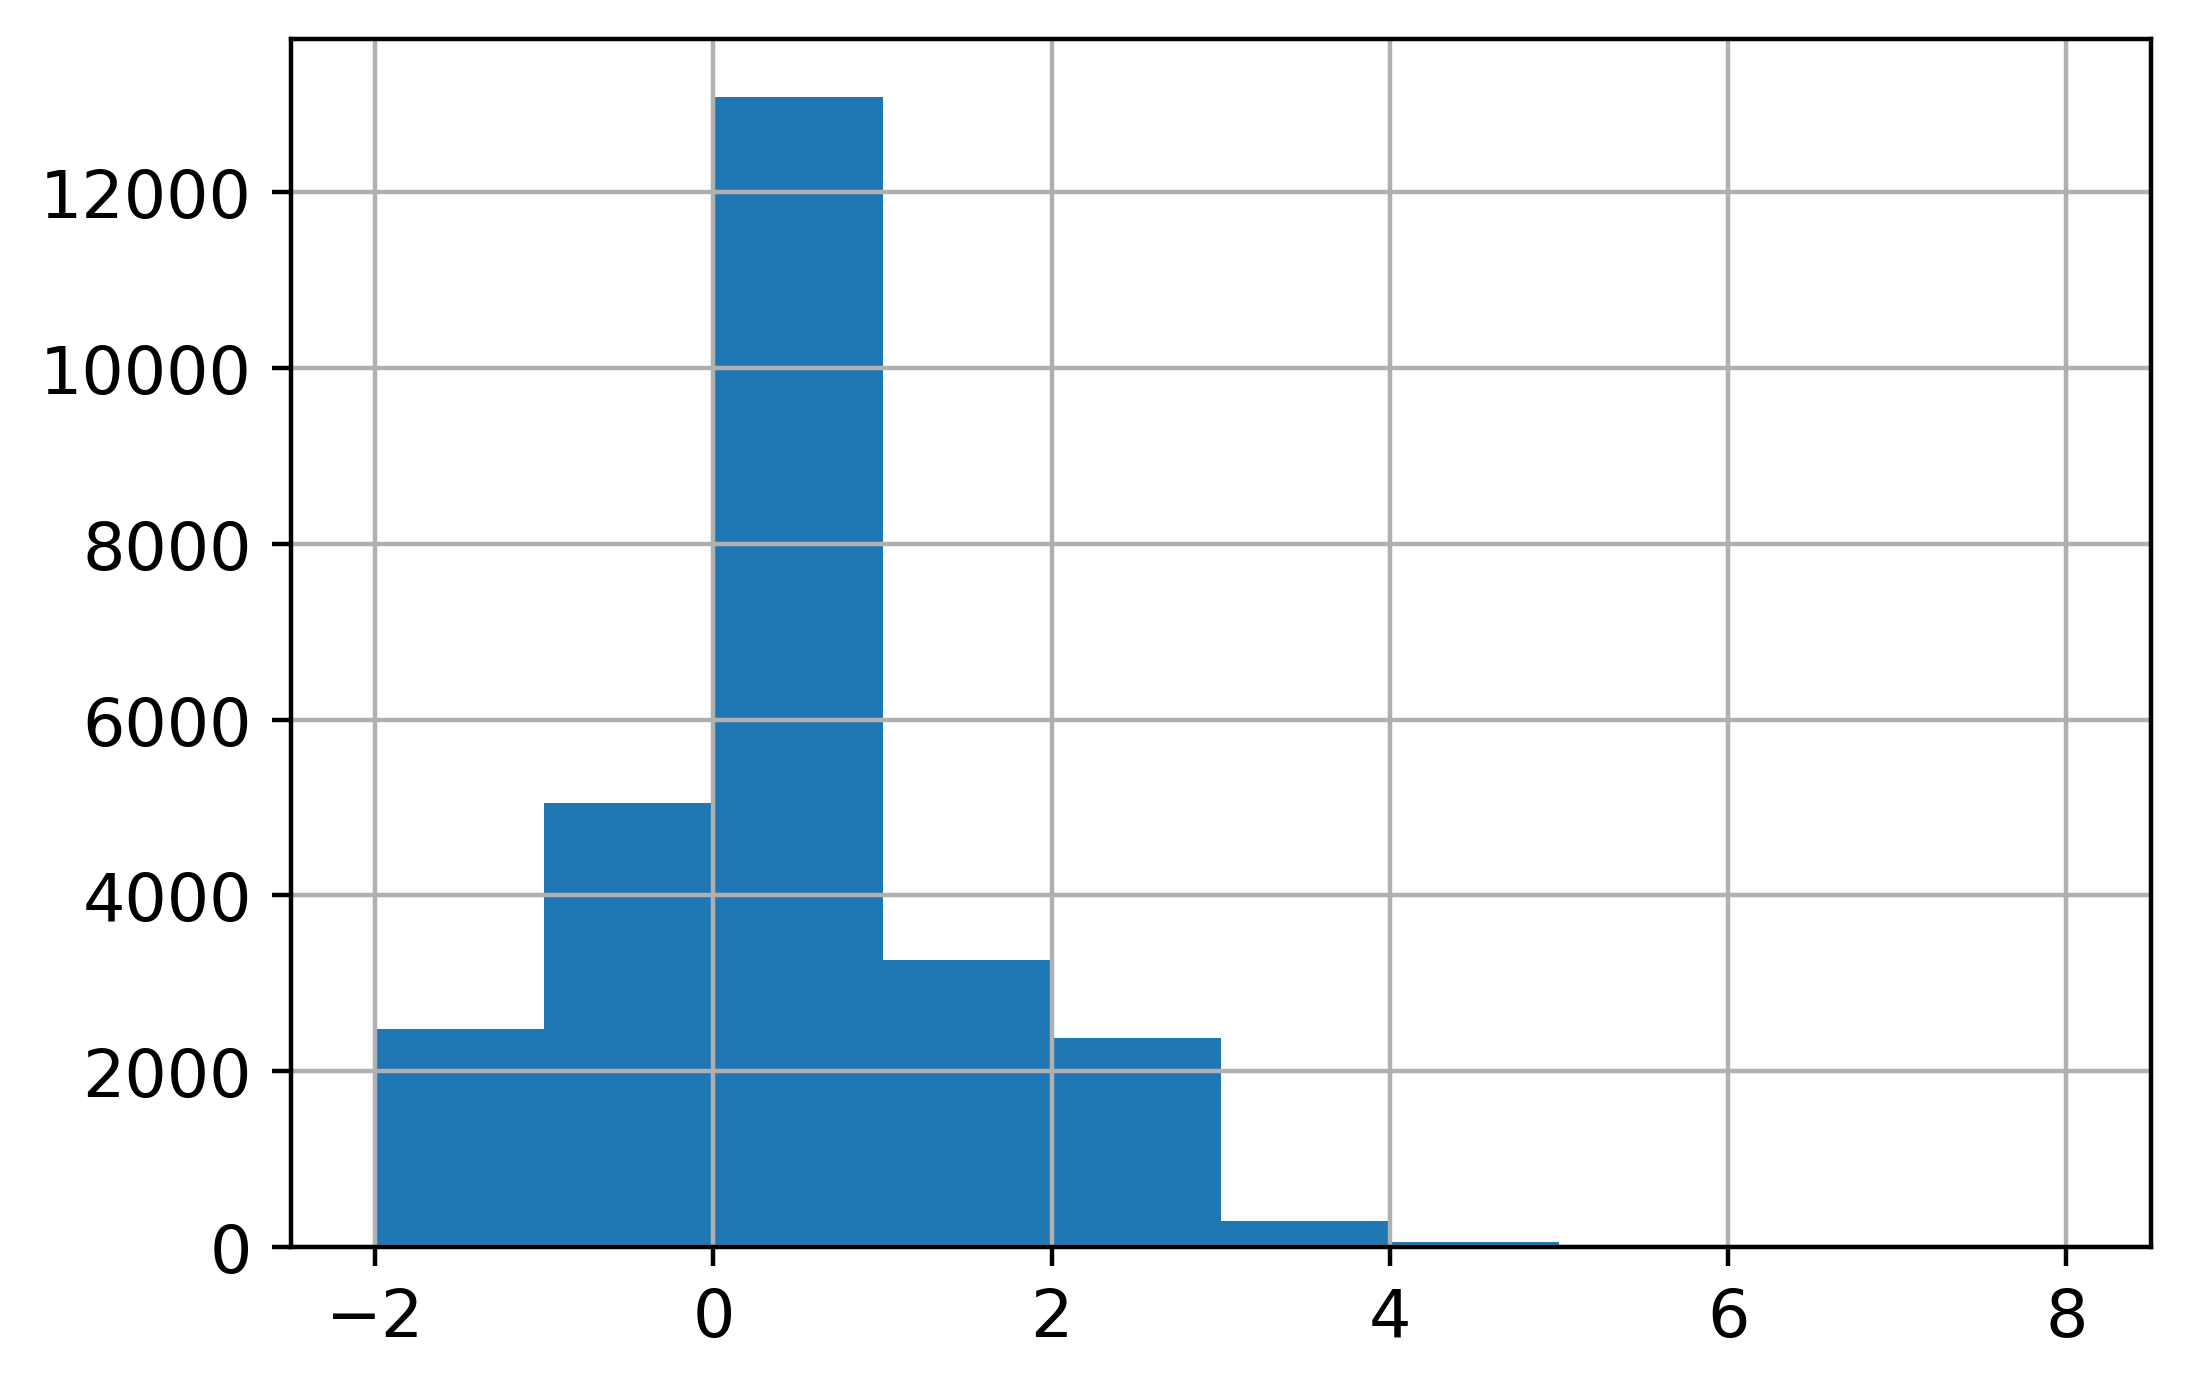

In [102]:
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 12
df[pay_feats[0]].hist()

In [103]:
pay_1_bins = np.array(range(-2, 10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

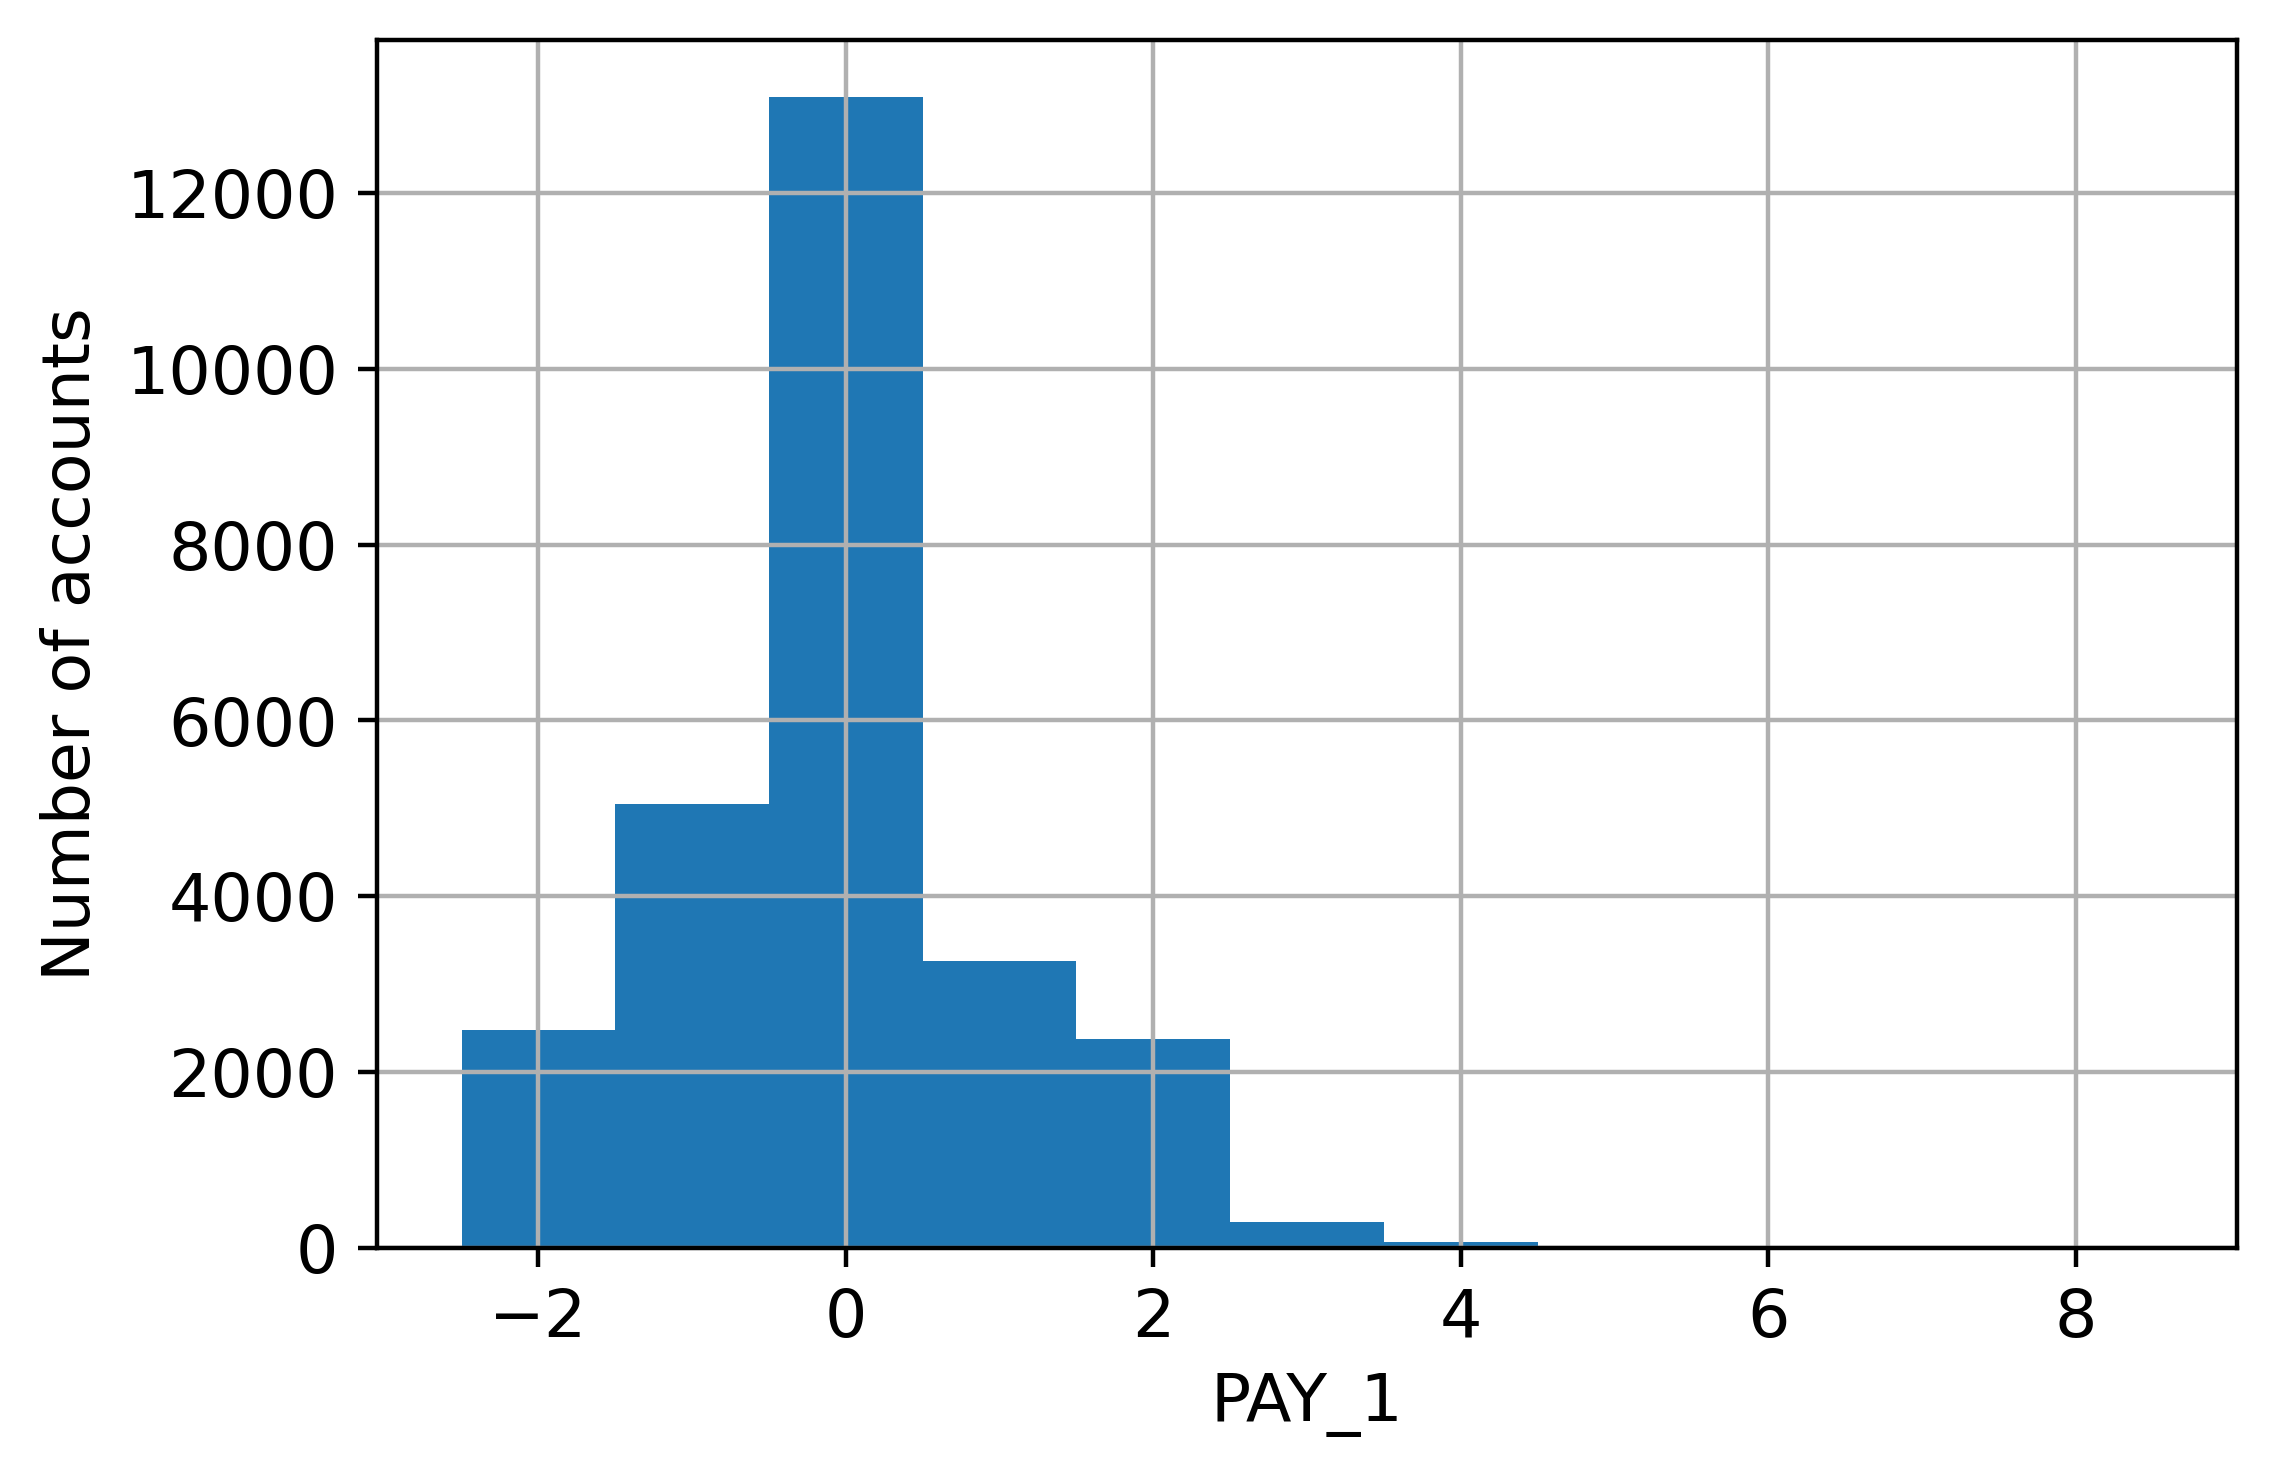

In [104]:
df[pay_feats[0]].hist(bins = pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

In [105]:
for feat in pay_feats:
    print(df[feat].value_counts().sort_index())

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64
-2     3375
-1     5368
 0    13961
 1       24
 2     3509
 3      289
 4       85
 5       24
 6       11
 7       17
 8        1
Name: PAY_2, dtype: int64
-2     3654
-1     5290
 0    13968
 1        3
 2     3400
 3      214
 4       69
 5       20
 6       19
 7       24
 8        3
Name: PAY_3, dtype: int64
-2     3893
-1     5070
 0    14596
 1        2
 2     2798
 3      161
 4       57
 5       30
 6        4
 7       51
 8        2
Name: PAY_4, dtype: int64
-2     4056
-1     4949
 0    15032
 2     2335
 3      151
 4       71
 5       14
 6        2
 7       53
 8        1
Name: PAY_5, dtype: int64
-2     4366
-1     5138
 0    14416
 2     2476
 3      156
 4       43
 5       10
 6       15
 7       42
 8        2
Name: PAY_6, dtype: int64


array([[<AxesSubplot:title={'center':'PAY_1'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>],
       [<AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>]], dtype=object)

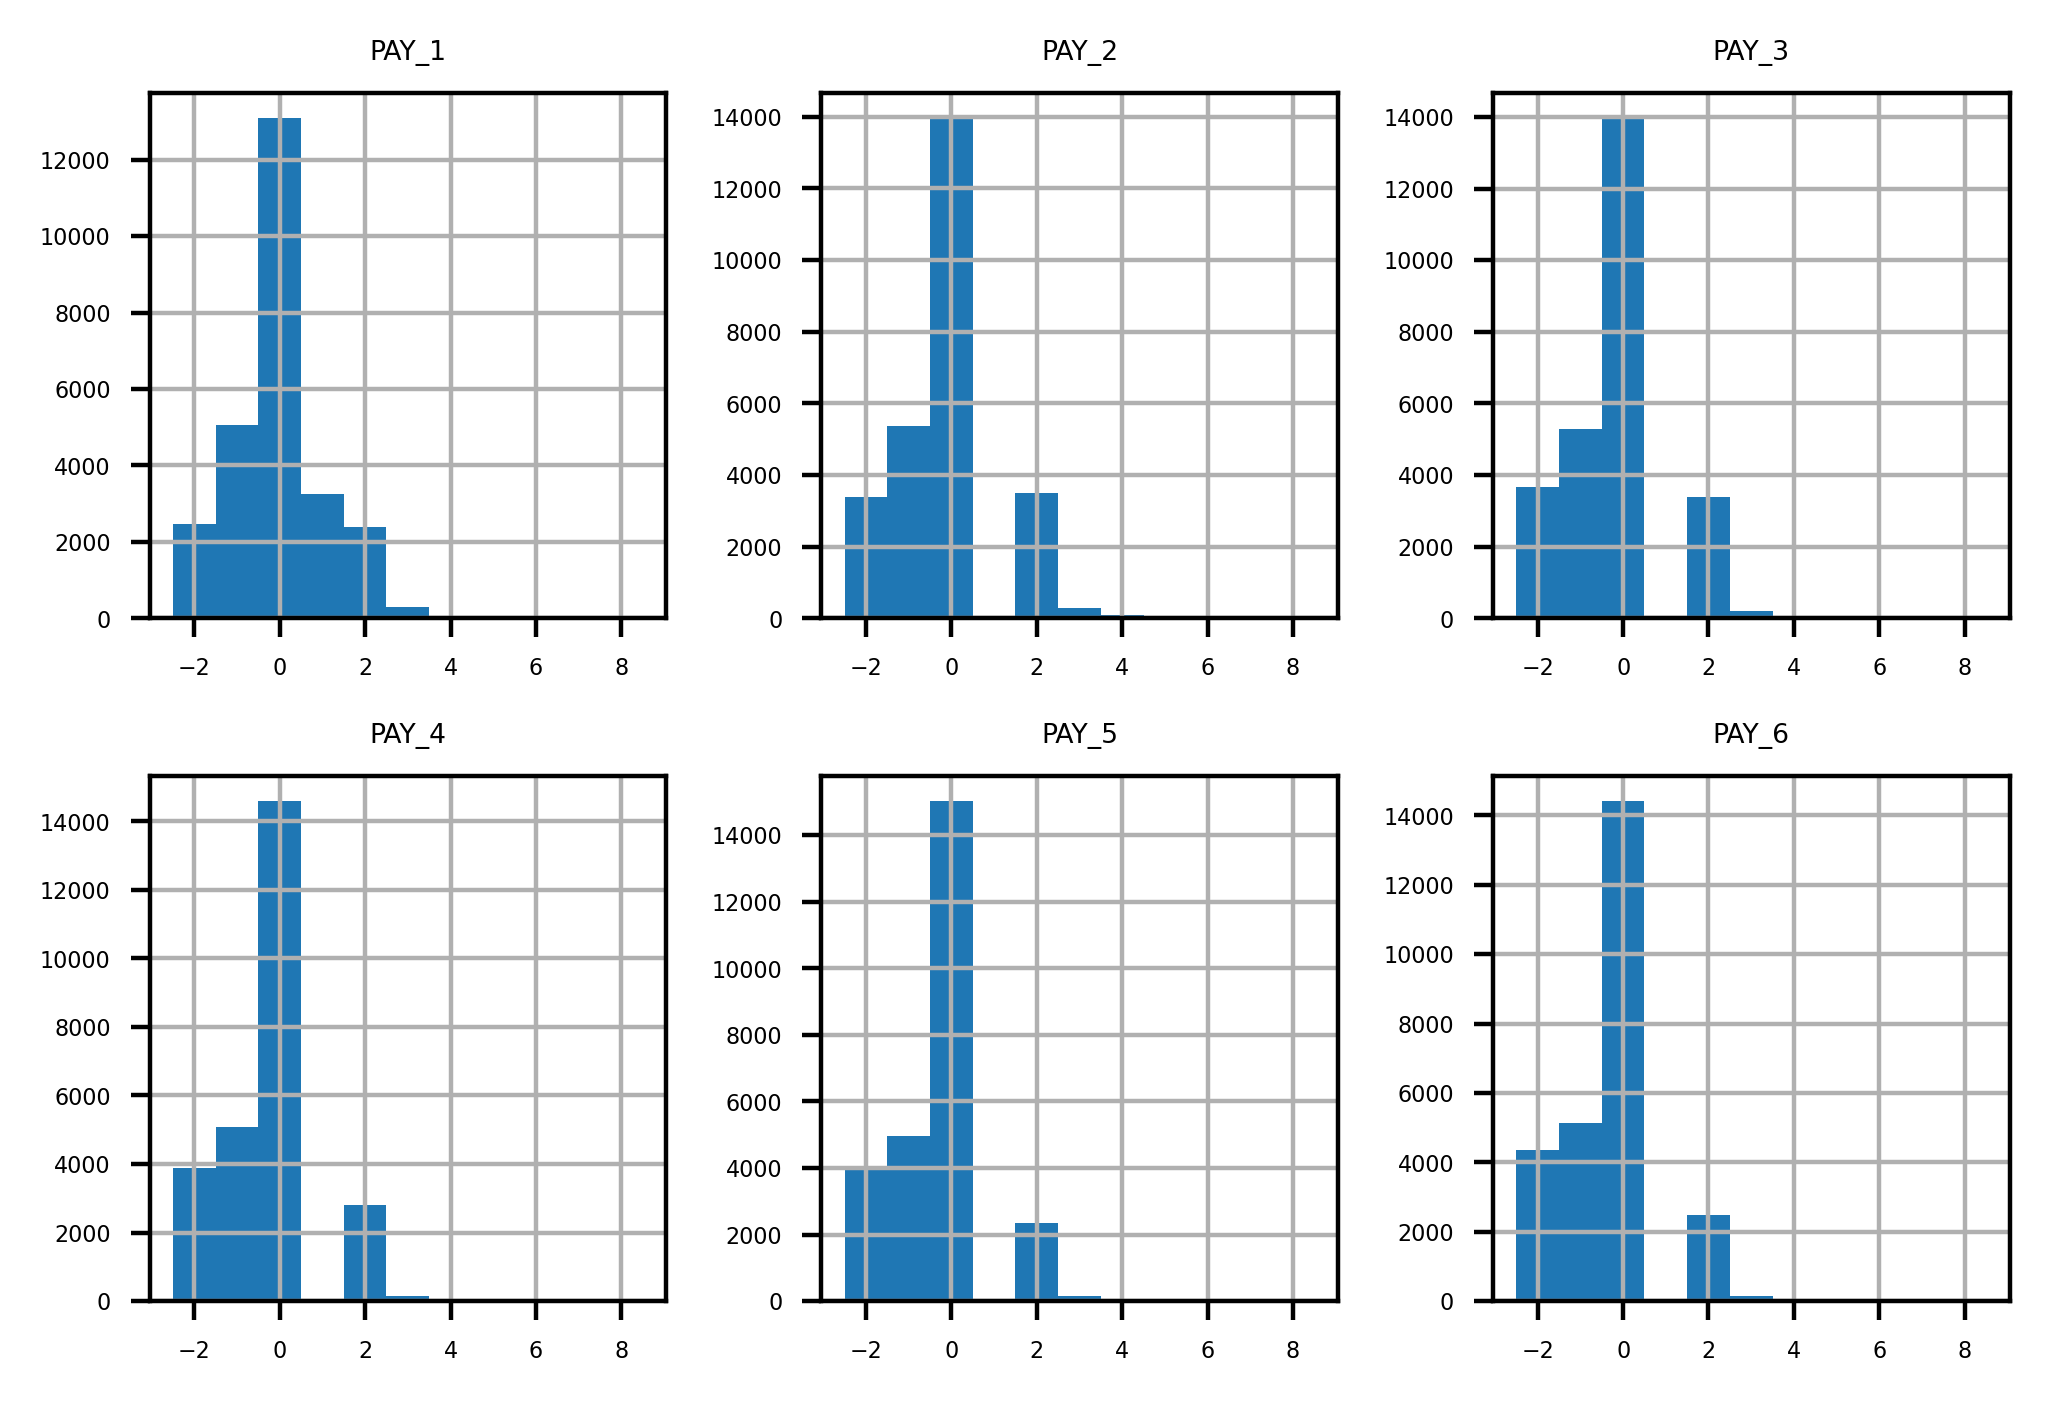

In [104]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins = pay_1_bins, layout = (2, 3))